In [72]:
import numpy as np

In [73]:
class XOR(object):
    def __init__(self):
        self.b1 = 0
        self.b2 = 0
        
    def sigmoid(self,z):
        z = 1/(1+np.exp(-z))
        return z
    
    def forward(self,w1,w2,x):
        z1 = np.dot(w1,x)+self.b1
        y_hat1 = self.sigmoid(z1)
        
        z2 = np.dot(w2,y_hat1)+self.b2
        y_hat2 = self.sigmoid(z2)
        
        
        return z1, y_hat1, z2, y_hat2
    
    def back_grad(self, m, w1, w2, z1, y_hat1, z2, y_hat2, y, x):
        
        dz2 = y_hat2-y
        dw2 = np.dot(dz2, y_hat1.T)/m
        
        dz1 = np.dot(w2.T, dz2) * y_hat1 * (1-y_hat1)
        dw1 = np.dot(dz1, x.T)/m
        
        dw1 = np.reshape(dw1, w1.shape)
        dw2 = np.reshape(dw2, w2.shape)
        
        return dz2, dw2, dz1, dw1
    
    def loss(self, t, t_hat, m):
        lo = -(1/m)*np.sum(t*np.log(t_hat)+(1-t)*np.log(1-t_hat))        
        return lo
    
    def optmizer(self, w1, w2, dw1, dw2, lr):
        w2 = w2 - lr*dw2
        w1 = w1 - lr*dw1
        return w2, w1
        

In [ ]:
xor = XOR()
w1 = np.random.rand(2,2)
w2 = np.random.rand(1,2)
print(w1, w2)
x = np.array([[0,0,1,1],[0,1,0,1]])
m = len(x[1])
lr = 0.1
y=np.array([[0,1,1,0]])

losses = []
for i in range(10000000):
    z1, y_hat1, z2, y_hat2 = xor.forward(w1,w2,x)
    # print(z1, y_hat1, z2, y_hat2)
    log_loss = xor.loss(y, y_hat2, m)
    losses.append(log_loss)
    
    dz2, dw2, dz1, dw1 = xor.back_grad(m, w1, w2, z1, y_hat1, z2, y_hat2, y, x)
    
    w2, w1 = xor.optmizer(w1, w2, dw1, dw2, lr)
    
    # print("w2------->",w2,"w1---->",w1)

    
    

[[0.48673177 0.09105519]
 [0.89984324 0.84681383]] [[0.490645  0.9317092]]


In [66]:
# array([[0, 0],
#        [0, 1],
#        [1, 0],
#        [1, 1]])
z1, y_hat1, z2, y_hat2 = xor.forward(w1,w2,x)
print(y_hat2)
prediction = (y_hat2 > 0.5) *1.0
print(prediction)

[[5.18689616e-04 9.97099020e-01 9.97099020e-01 5.11597325e-03]]
[[0. 1. 1. 0.]]


In [67]:
import matplotlib.pyplot as plt

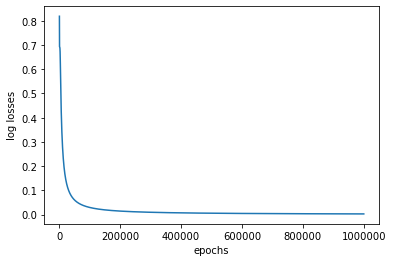

In [68]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("log losses")
plt.show()

In [70]:
np.max(losses)

0.8184716099509778

In [71]:
1-np.max(losses)

0.18152839004902221